# Profile Visualization
In this notebook, we visualize the profiles from the best-performing methods on MOSAD, namely ClaSP and FLOSS.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys
sys.path.append("../")

from tqdm import tqdm

In [3]:
from src.utils import load_mosad_dataset
from src.visualizer import plot_profile_with_ts, plot_ts

In [4]:
df_mosad = load_mosad_dataset()
df_mosad.head()

,dataset,routine,subject,sensor,sample_rate,change_points,activities,time_series
0,Routine1_Subject1_X-Acc,1,1,X-Acc,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-0.1986, -0.454326, -0.5473, -0.496056, -0.48..."
1,Routine1_Subject1_X-Gyro,1,1,X-Gyro,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[0.0174, 0.0358, 0.0431, 0.0358, 0.0168, 0.008..."
2,Routine1_Subject1_X-Mag,1,1,X-Mag,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-31.02, -30.84, -30.65, -30.58, -31.52, -30.7..."
3,Routine1_Subject1_Y-Acc,1,1,Y-Acc,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-0.0161, -0.100877, -0.1434, -0.13972, -0.081..."
4,Routine1_Subject1_Y-Gyro,1,1,Y-Gyro,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[descend stairs, climb stairs, vacuum, lie, ir...","[-0.0525, -0.0568, -0.0482, -0.0012, 0.0153, 0..."


Let's load some classification score profiles.

In [16]:
competitor = "ClaSP"
converters = dict([(column, lambda x: eval(x.replace("inf", "1"))) for column in ["true_cps", "found_cps", "profile"]])
df_score = pd.read_csv(f"../experiments/{competitor}.csv.gz", converters=converters, compression="gzip")
df_score

,dataset,true_cps,found_cps,f1_score,covering_score,profile
0,Routine1_Subject1_X-Acc,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[1362, 715, 14081, 11362, 13237, 12695, 11683,...",0.538,0.452,"[0.6991410181517314, 0.6991410181517314, 0.699..."
1,Routine1_Subject1_X-Gyro,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[14116, 11381, 13208, 12687, 1488, 727, 50180,...",0.538,0.438,"[0.6855908501458291, 0.6855908501458291, 0.685..."
2,Routine1_Subject1_X-Mag,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[29825, 21642, 37344, 35205, 31470, 32757, 323...",0.462,0.448,"[0.664898990794126, 0.664898990794126, 0.66489..."
3,Routine1_Subject1_Y-Acc,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[1387, 733, 14093, 11423, 12482, 13157, 50168,...",0.769,0.713,"[0.7063443863287695, 0.7063443863287695, 0.706..."
4,Routine1_Subject1_Y-Gyro,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[1367, 636, 14093, 11386, 13200, 12186, 1022, ...",0.538,0.440,"[0.6864941024896959, 0.6864941024896959, 0.686..."
5,Routine1_Subject1_Y-Mag,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[29723, 664, 14086, 11402, 13333, 21669, 12672...",0.538,0.555,"[0.6646973678089755, 0.6646973678089755, 0.664..."
6,Routine1_Subject1_Z-Acc,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[14124, 11359, 12414, 13203, 1363, 734, 31470,...",0.692,0.569,"[0.7181990751882014, 0.7181990751882014, 0.718..."
7,Routine1_Subject1_Z-Gyro,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[14108, 11434, 1386, 736, 13202, 12683, 11851,...",0.538,0.444,"[0.73872849513724, 0.73872849513724, 0.7387284..."
8,Routine1_Subject1_Z-Mag,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[14121, 11391, 13334, 12421, 29675, 21641, 326...",0.615,0.655,"[0.6850136741802935, 0.6850136741802935, 0.685..."
9,Routine1_Subject2_X-Acc,"[928, 1652, 10952, 14086, 20136, 29236, 32502,...","[725, 1563, 1018, 51193, 54088, 38647, 37365, ...",0.615,0.579,"[0.6652649017884734, 0.6652649017884734, 0.665..."


<Figure size 432x288 with 0 Axes>

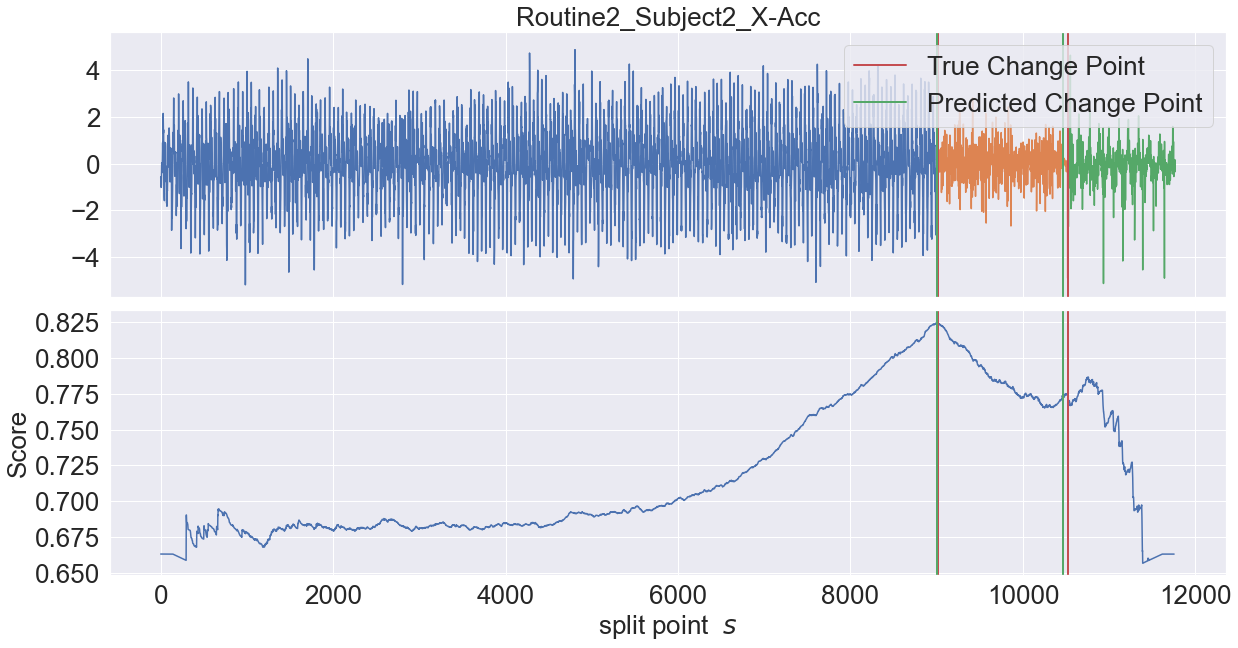

In [17]:
selection = 54

row = df_score.iloc[selection,:]
plot_profile_with_ts(row.dataset, df_mosad.iloc[selection,:].time_series, np.array(row.profile), np.array(row.true_cps), np.array(row.found_cps), score="Score", show=True)